In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train=y_train.reshape(-1,)

In [4]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.title(labels[y[index]])

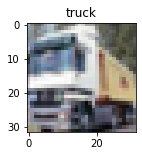

In [5]:
plot_sample(x_train,y_train,1)

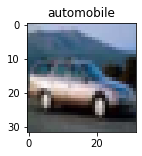

In [6]:
plot_sample(x_train,y_train,4)

In [7]:
x_train=x_train/255
x_test=x_test/255

## Now we will train the model with ann 

In [14]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=60,batch_size=512)

Epoch 1/60
98/98 [==============================] - 12s 123ms/step - loss: 2.8145 - accuracy: 0.2321
Epoch 2/60
98/98 [==============================] - 12s 118ms/step - loss: 1.7676 - accuracy: 0.3694
Epoch 3/60
98/98 [==============================] - 14s 147ms/step - loss: 1.6597 - accuracy: 0.4107
Epoch 4/60
98/98 [==============================] - 13s 130ms/step - loss: 1.6001 - accuracy: 0.4309
Epoch 5/60
98/98 [==============================] - 14s 141ms/step - loss: 1.5441 - accuracy: 0.4538
Epoch 6/60
98/98 [==============================] - 13s 129ms/step - loss: 1.5020 - accuracy: 0.4679
Epoch 7/60
98/98 [==============================] - 12s 127ms/step - loss: 1.4701 - accuracy: 0.4794
Epoch 8/60
98/98 [==============================] - 15s 153ms/step - loss: 1.4450 - accuracy: 0.4882
Epoch 9/60
98/98 [==============================] - 13s 133ms/step - loss: 1.4175 - accuracy: 0.4958
Epoch 10/60
98/98 [==============================] - 13s 133ms/step - loss: 1.3929 - accura

### Now we will train the model with cnn..

In [15]:
cnn=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[32,32,3]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
     keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=60,batch_size=512)

Epoch 1/60
98/98 [==============================] - 18s 178ms/step - loss: 1.8166 - accuracy: 0.3472
Epoch 2/60
98/98 [==============================] - 18s 181ms/step - loss: 1.4443 - accuracy: 0.4872
Epoch 3/60
98/98 [==============================] - 21s 217ms/step - loss: 1.3119 - accuracy: 0.5370
Epoch 4/60
98/98 [==============================] - 20s 209ms/step - loss: 1.2282 - accuracy: 0.5694
Epoch 5/60
98/98 [==============================] - 21s 212ms/step - loss: 1.1640 - accuracy: 0.5931
Epoch 6/60
98/98 [==============================] - 22s 222ms/step - loss: 1.1188 - accuracy: 0.6093
Epoch 7/60
98/98 [==============================] - 21s 213ms/step - loss: 1.0783 - accuracy: 0.6228
Epoch 8/60
98/98 [==============================] - 20s 207ms/step - loss: 1.0467 - accuracy: 0.6339
Epoch 9/60
98/98 [==============================] - 22s 221ms/step - loss: 1.0131 - accuracy: 0.6475
Epoch 10/60
98/98 [==============================] - 20s 208ms/step - loss: 0.9976 - accura

In [16]:
y_p=cnn.predict(x_test)
y_p

array([[2.38906014e-05, 1.76554568e-06, 8.48995260e-05, ...,
        1.80504339e-05, 9.65024537e-06, 3.46528637e-08],
       [2.45770141e-02, 2.19184812e-02, 1.95886152e-08, ...,
        2.15939044e-10, 9.53495681e-01, 8.71524298e-06],
       [1.60315260e-02, 4.34168754e-03, 9.22551844e-05, ...,
        4.89092723e-04, 9.78377640e-01, 2.35365151e-04],
       ...,
       [3.11074103e-07, 4.53422366e-09, 3.28284758e-03, ...,
        7.59472186e-03, 3.36201060e-06, 1.82596271e-10],
       [4.22093505e-03, 3.51708219e-03, 1.20500743e-03, ...,
        7.00328674e-04, 1.03246564e-10, 4.05732953e-06],
       [2.77310050e-11, 1.24348909e-09, 7.39133327e-07, ...,
        9.99856710e-01, 3.05903552e-10, 7.25413818e-09]], dtype=float32)

In [45]:
y_prediction=[]
for element in y_p:
    y_predict=np.argmax((element))
    y_prediction.append(y_predict)
y_prediction=np.array([y_prediction])
y_prediction=y_prediction.reshape(-1,)
y_prediction

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [51]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

### Now we will plot the x_test with actual value as title and predicted value as xlabel ..

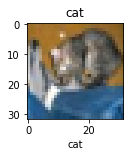

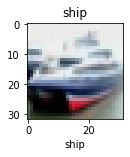

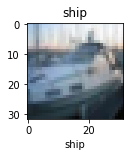

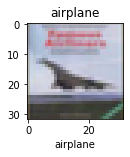

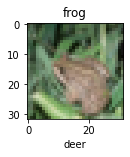

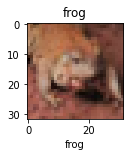

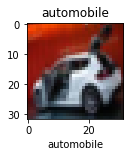

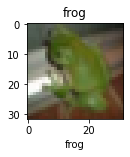

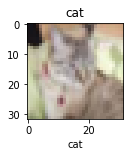

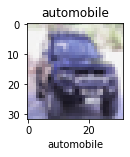

In [63]:
for i in range (0,10):
    plt.figure(figsize=(10,5))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(labels[y_test[i]])
    plt.xlabel(labels[y_prediction[i]])


## Thank you !!